
## Homework # 1 AI 240 Machine Learning Course
### Instructor - Dr. Uma Gajendragadkar



##  Salary Prediction with Linear Regression Algorithm

### Learning Topic - Linear Regression Algorithm in Machine Learning
 
 
 ### Problem - To develop a machine learning model to predict salary.




# Import libraries

## Step 1: Import the required python packages
Write code to import Pandas for data manipulation, NumPy for mathematical calculations, and MatplotLib, and Seaborn for visualizations, Sklearn libraries used for machine learning operations

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2 - Import data

Write code to read data into pandas dataframe

In [6]:
df_salary = pd.read_csv("Salary_Data.csv")

## Step 3 - Look at data 
Write code to display top 5 and bottom 5 rows

In [64]:
print(df_salary.head())
print(df_salary.tail())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
    YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


## Step 4  Analyze data

 Write code to describe data

In [66]:
# df_salary.info()
# print(df_salary.columns)
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Step 5 Check Distribution of data
### Write code to draw distplot using seaborn library

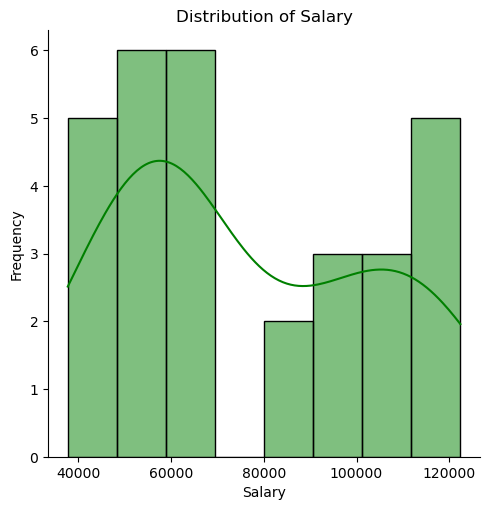

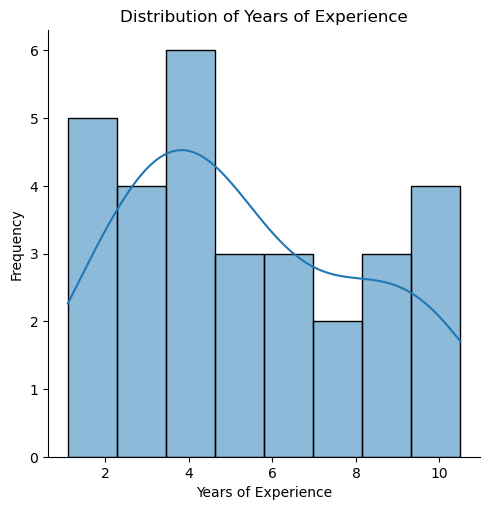

In [13]:
# 'Salary' column 
sns.displot(data = df_salary, kind = 'hist', x = "Salary", bins = 8, kde = True, color = 'green')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 'YearsExperience' column 
sns.displot(data = df_salary, kind = 'hist', x = "YearsExperience", bins = 8, kde = True)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

## Find Relationship between Salary and Experience

### Write code to draw scatterplot between salary and experience and see how they are correlated.

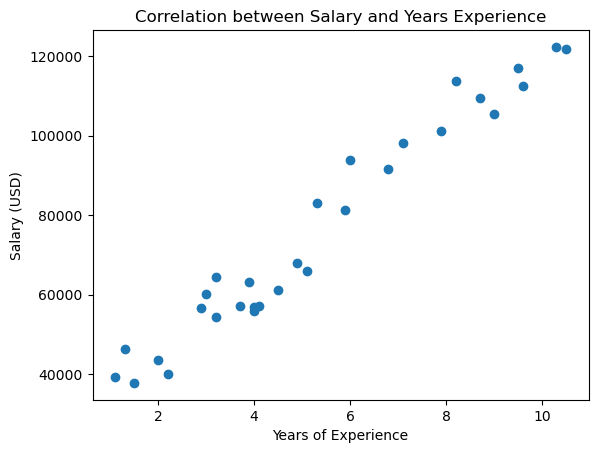

In [15]:
# sns.relplot(data = df_salary, kind = 'scatter', x = 'YearsExperience', y = 'Salary')   
# Appears to generally be a positive correlation

# Alternate way:
plt.scatter(df_salary['YearsExperience'], df_salary['Salary'])
plt.title('Correlation between Salary and Years Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.show()

## Step 6 Split data

## Split into Independent/Dependent variables

### Write code to Split into Independent/Dependent variables x and y
Experience (X) is the independent variable
Salary (y) is dependent on experience

In [18]:
# Salary depends on YearsExperience

X = df_salary[['YearsExperience']]   # Independent variable x
y = df_salary[['Salary']]            # Dependent variable y

## Step 7 Split into Train/Test sets

### Write code to divide data into training and test set (80/20 ratio)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Step 8 Train model

## Write code to train the model using Linear Regression Algorithm

In [23]:
# Create a linear regression omdel
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Step 9  Predict results

### Write code to predict the results

In [26]:
# Make predictions using our model
y_pred = model.predict(X_test)

In [27]:
# Model evaulation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r_squared:.2f}')

# Based on what I can tell, an R-squared value of 0.90 would imply a good linear relationship bwetween experience and salary

Mean Squared Error: 49830096.86
R-Squared: 0.90


## Step 10 Visualize predictions

## Prediction on training set

### Write code to Plot the training and test results
Its time to test our predicted results by plotting graphs

Write code to Plot training set data vs predictions
First we plot the result of training sets (X_train, y_train) with X_train and predicted value of y_train (regressor.predict(X_train))

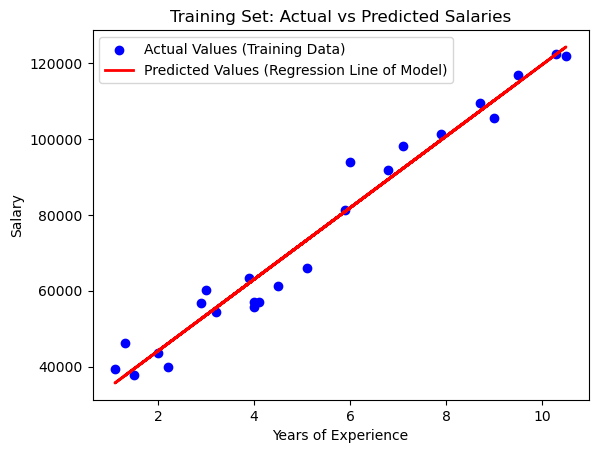

In [31]:
# The differences between actual and predicted Y values show how closely (or loosely) the model matches the training data.
# Here I plotted x and y training data points, then plotted the same x data along with the predicted y data in the same graph as a line. 
# We see the differences between y values since the x values are the same.
# The red regression line represents the model’s learned linear relationship between experience and salary

# Scatter plot of actual data points:
plt.scatter(X_train, y_train, color='blue', label='Actual Values (Training Data)')

# Using a line plot since this is the prediction model, not data points: 
# Line plot of predictions - x training data with predicted values of y_train:
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Predicted Values (Regression Line of Model)')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Training Set: Actual vs Predicted Salaries')
plt.legend()
plt.show()

## Prediction on test set

### Write code to Plot test set data vs predictions
we plot the result of test sets (X_test, y_test) with X_train and predicted value of y_train (regressor.predict(X_train))

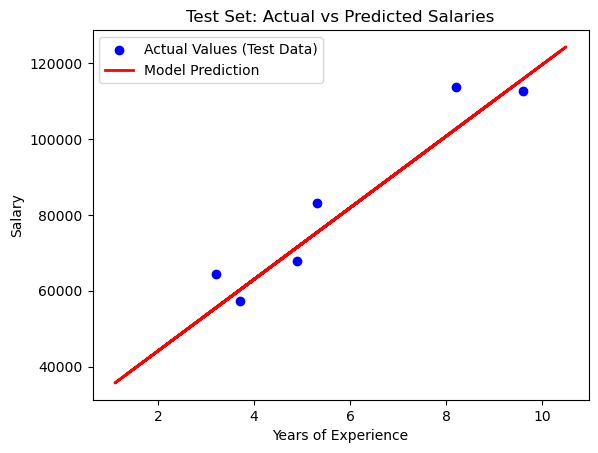

In [34]:
# Step 2 is similar to what was just done, but now we focus on the TEST set to see how well the model performs on unseen data.
# We use the same red regression line as defined above (with X_train and predictecd value of y_train)

# Scatter plot of actual test data:
plt.scatter(X_test, y_test, color='blue', label='Actual Values (Test Data)')

# Line plot of predictions:
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Model Prediction')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Test Set: Actual vs Predicted Salaries')
plt.legend()
plt.show()


## Write code to plot the prediction on test set

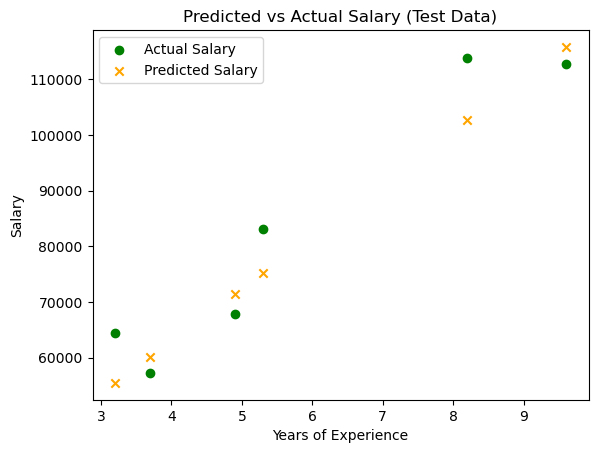

In [57]:
# Scatterplot comparison between TESTING values and PREDICTED values:
# for identifying the fit of the data:

plt.scatter(X_test, y_test, color='green', label='Actual Salary')
plt.scatter(X_test, y_pred, color='orange', label='Predicted Salary', marker='x')

# Labels and title
plt.title('Predicted vs Actual Salary (Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()



## Step 11  Coefficient and Intercept

### Write code to find coefficient and intercept
we discussed the linear equation y = mx + c, we can also get the c (y-intercept) and m (slope/coefficient) from the regressor model.

In [55]:
# Getting the slope (coefficient) and intercept
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Coefficient (slope): {coefficient}")
print(f"Intercept: {intercept}")

print(f"The linear equation is: Salary = {coefficient:.2f} * YearsExperience + {intercept:.2f}")


Coefficient (slope): 9423.815323030976
Intercept: 25321.583011776813
The linear equation is: Salary = 9423.82 * YearsExperience + 25321.58
